# Analiza letalskih nesreč

## Uvozimo podatke

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
letalske_nesrece = pd.read_csv('rezultati.csv', na_values=["Ni podatka", "UK"])

## Analiza

In [119]:
colormap = plt.colormaps['tab20']
barve = colormap.colors

### Tabela vseh nesreč

In [ ]:
meseci = {'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12, 'Ni podatka': 13
}
letalske_nesrece['mesec_stevilka'] = letalske_nesrece['mesec'].map(meseci)
letalske_nesrece = letalske_nesrece.sort_values(by=['leto', 'mesec_stevilka'])
letalske_nesrece = letalske_nesrece.reset_index(drop=True)

In [121]:
letalske_nesrece

,mesec,leto,model_letala,operater,starost_letala,smrtne_zrtve,posadka,razmerje_prezivelih,skoda_letala,vrsta_nesrece,faza_leta,narava_leta,kraj_nesrece,drzava_nesrece,odhodno_letalisce,ciljno_letalisce,mesec_stevilka
0,August,1919,Caproni Ca.48,Caproni,0.0,14.0,14.0,0.0,Destroyed & written off,Accident,En route,Passenger,Verona,Italy,Venice-Marco Polo Airport VCE/LIPZ,Milano-Taliedo Airport,8.0
1,August,1919,Felixstowe Fury,Royal Air Force - RAF,1.0,1.0,7.0,86.0,Destroyed & written off,Accident,Initial climb,Military,Felixtowe RNAS,United Kingdom,Felixstowe RNAS,Felixstowe RNAS,8.0
2,February,1920,Handley Page O/7,Handley Page Transport,1.0,0.0,10.0,100.0,Destroyed & written off,Accident,En route,Passenger - Scheduled,Acadia Siding,South Africa,NaN,NaN,2.0
3,February,1920,Handley Page O/400,Handley Page Transport,NaN,0.0,4.0,100.0,Destroyed & written off,Accident,NaN,NaN,El Shereik,Sudan,Aswan Airport ASW/HESN,Khartoum-Civil Airport KRT/HSSS,2.0
4,June,1920,Handley Page O/400,Handley Page Transport,1.0,0.0,2.0,100.0,Destroyed & written off,Accident,En route,Demo/Airshow/Display,Östanå,Sweden,Stockholm unknown airport,Kjeller Air Base ENKJ,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26578,December,2024,Cessna 560 Citation V Ultra,International Aviation Sales LTD opb Phoenix G...,26.0,0.0,2.0,100.0,Substantial,Accident,Taxi,Ferry/positioning,Hartsfield–Jackson Atlanta International Airport,United States of America,Atlanta Hartsfield-Jackson International Airpo...,Tampa International Airport FL TPA/KTPA,12.0
26579,December,2024,Boeing 737-4Y0 SF,Allied Air,31.0,0.0,6.0,100.0,Substantial,Accident,Landing,Ferry/positioning,Abuja-Nnamdi Azikiwe International Airport,Nigeria,Lagos-Murtala Muhammed International Airport L...,Abuja-Nnamdi Azikiwe International Airport ABV...,12.0
26580,December,2024,Embraer ERJ-145EP,Loganair,NaN,0.0,23.0,100.0,NaN,Accident,Initial climb,Passenger - Scheduled,Edinburgh Airport,United Kingdom,Edinburgh-Turnhouse Airport EDI/EGPH,Southampton-Eastleigh Airport SOU/EGHI,12.0
26581,December,2024,Antonov An-2R,Mobil Avia,NaN,0.0,8.0,100.0,Substantial,Accident,Approach,Passenger - Non-Scheduled/charter/Air Taxi,Tambey Airstrip,Russia,Yamburg Airport USMQ,Tambey Airstrip,12.0


In [122]:
meseci = letalske_nesrece['mesec'].dropna().value_counts()

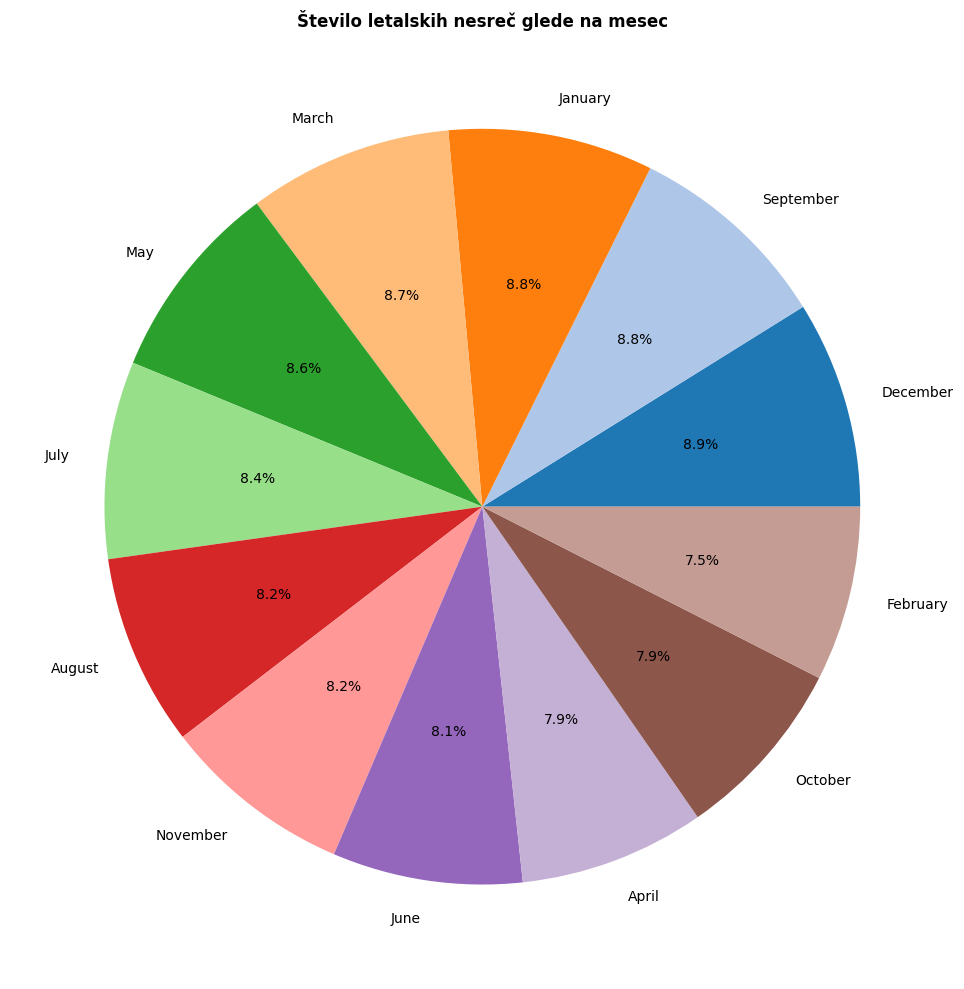

In [123]:
meseci.plot.pie(colors=barve, autopct='%1.1f%%', figsize=(10, 10), ylabel='')
plt.title('Število letalskih nesreč glede na mesec', fontweight='bold');
plt.tight_layout()

### Število letalskih nesreč na leto

In [124]:
letno_stevilo_nesrec = letalske_nesrece.groupby('leto').size().reset_index(name='letno_stevilo_nesrec')

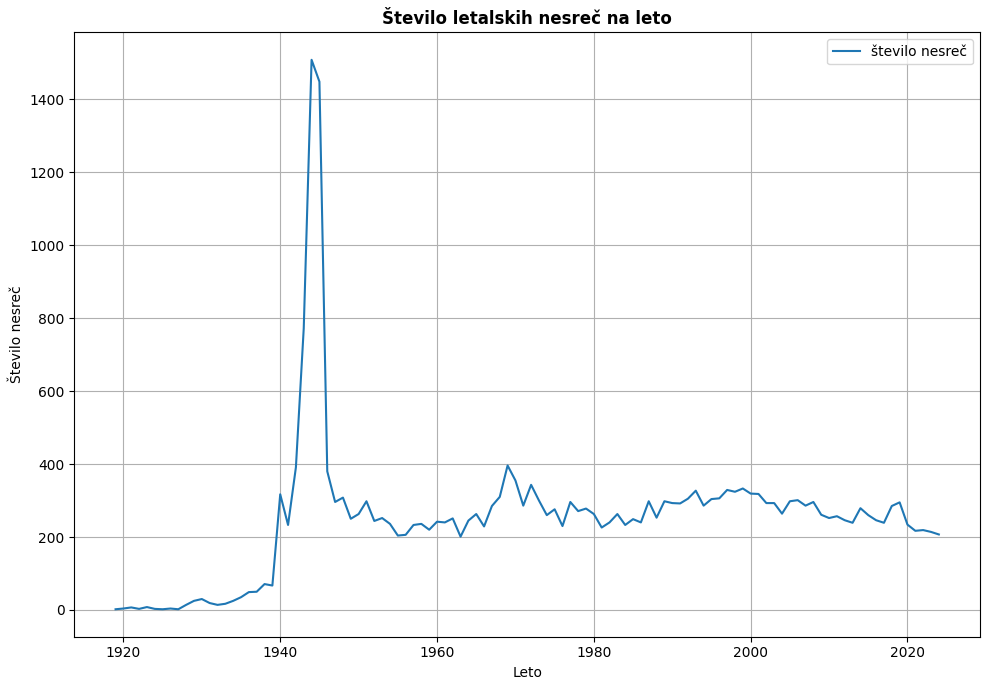

In [125]:
letno_stevilo_nesrec.plot.line(x='leto', y='letno_stevilo_nesrec', figsize=(10,7))
plt.xlabel('Leto')
plt.ylabel('Število nesreč')
plt.title('Število letalskih nesreč na leto', fontweight='bold')
plt.legend(['število nesreč'])
plt.tight_layout()
plt.grid(True)

### Narava leta in države, leto ko je bilo največ nesreč

In [126]:
stevilo_nesrec_padajoce = letno_stevilo_nesrec.sort_values(by='letno_stevilo_nesrec', ascending = False)
najvecje_leto = stevilo_nesrec_padajoce.head(1)['leto']
leto = najvecje_leto.values[0]
podatki_za_leto = letalske_nesrece[letalske_nesrece['leto'] == leto]
podatki_za_leto = podatki_za_leto.dropna()
narava_leta = podatki_za_leto.groupby(by=['narava_leta']).size().sort_values(ascending=False)

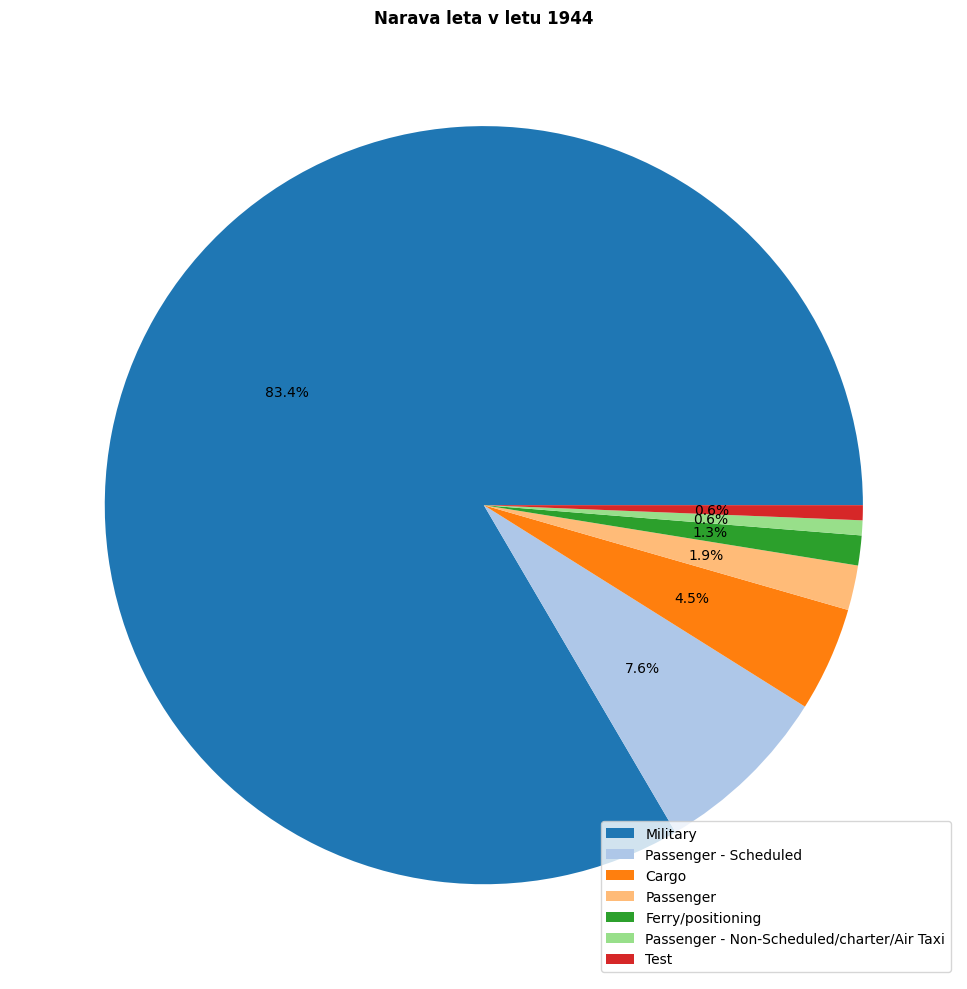

In [127]:
narava_leta.plot.pie(colors=barve, labels=None, autopct='%1.1f%%', figsize=(10, 10), ylabel='')
plt.title(f'Narava leta v letu {leto}', fontweight='bold')
plt.legend(narava_leta.index, loc='lower right')
plt.tight_layout()

In [141]:
drzave = podatki_za_leto.groupby(by=['drzava_nesrece']).size().sort_values(ascending=False).head(20)

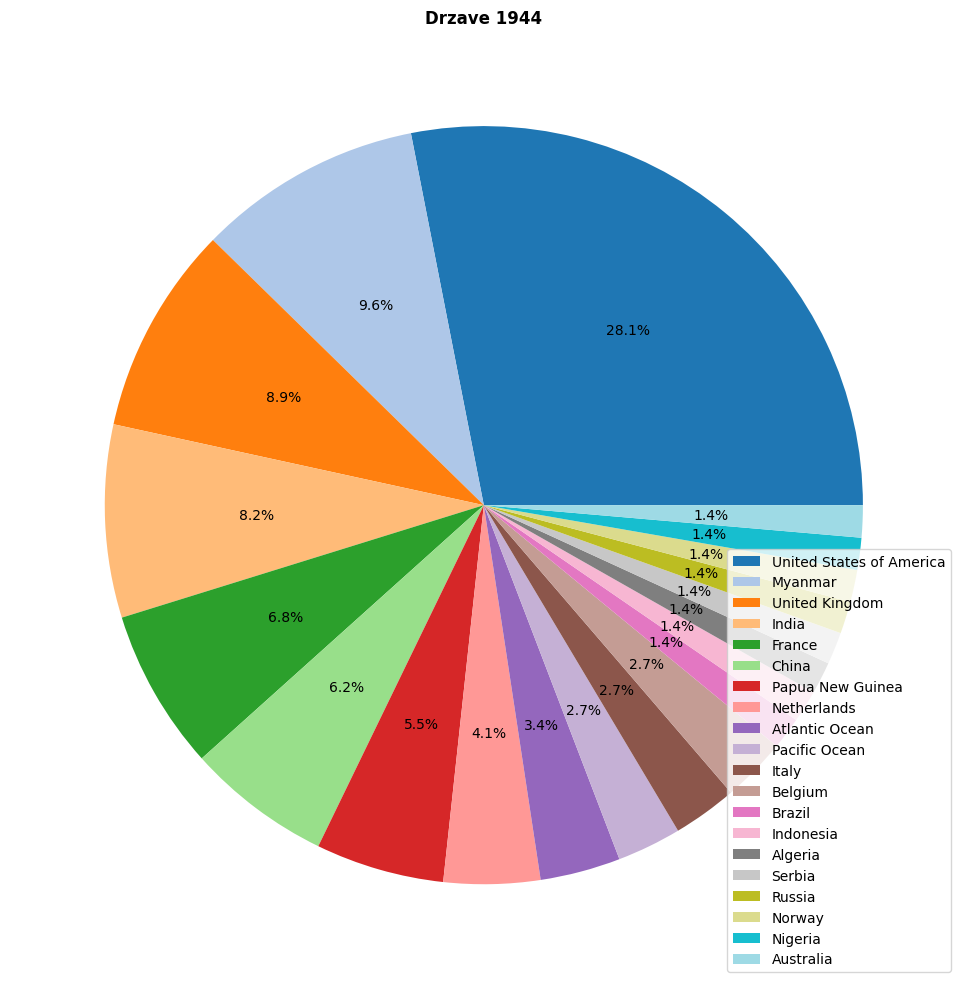

In [ ]:
drzave.plot.pie(colors=barve, labels=None, autopct='%1.1f%%', figsize=(10, 10), ylabel='')
plt.title(f'Države {leto}', fontweight='bold')
plt.legend(drzave.index, loc='lower right')
plt.tight_layout()

### Delež nesreč po fazi leta ob nesreči

In [130]:
faze = letalske_nesrece['faza_leta'].dropna().value_counts()

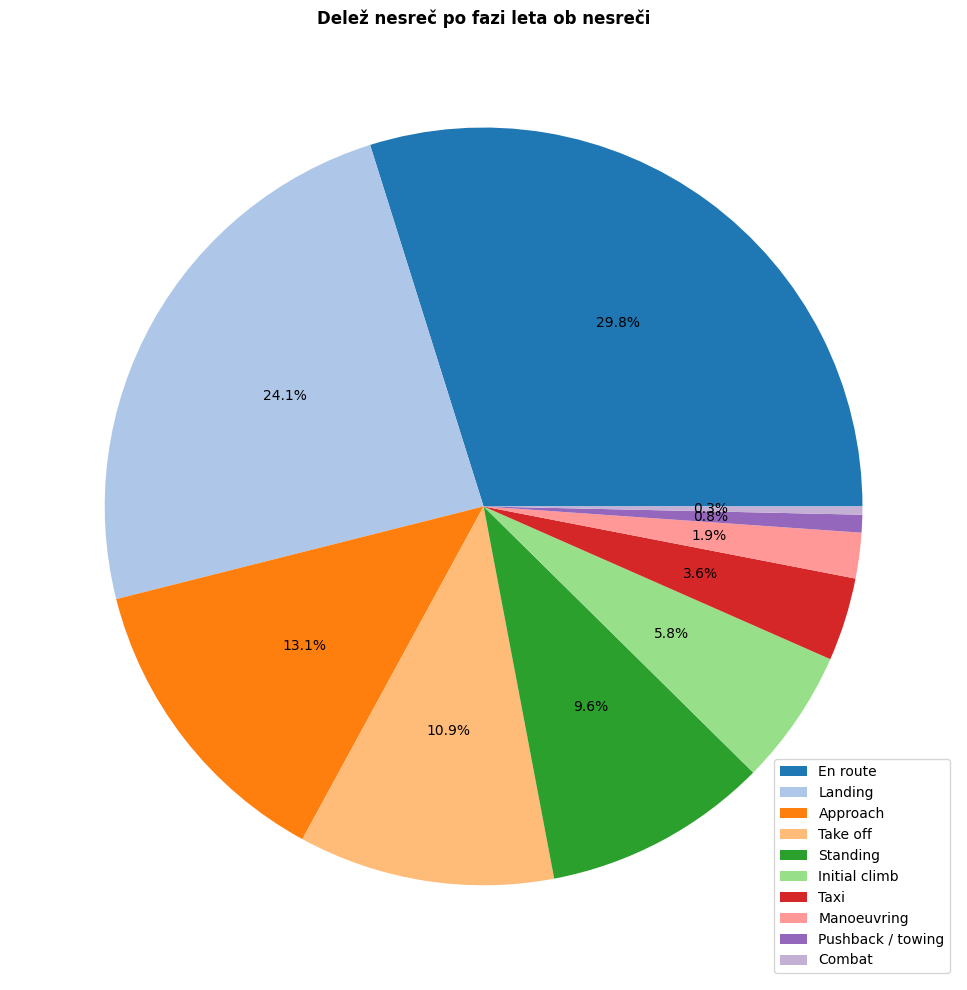

In [131]:
faze.plot.pie(colors=barve, labels=None, autopct='%1.1f%%', figsize=(10, 10), ylabel='')
plt.title("Delež nesreč po fazi leta ob nesreči", fontweight='bold');
plt.legend(faze.index, loc='lower right')
plt.tight_layout()

### Razmerje preživelih

In [132]:
tabela = letalske_nesrece.dropna(subset=['razmerje_prezivelih'])
povprecje_letno = tabela.groupby('leto')['razmerje_prezivelih'].mean()

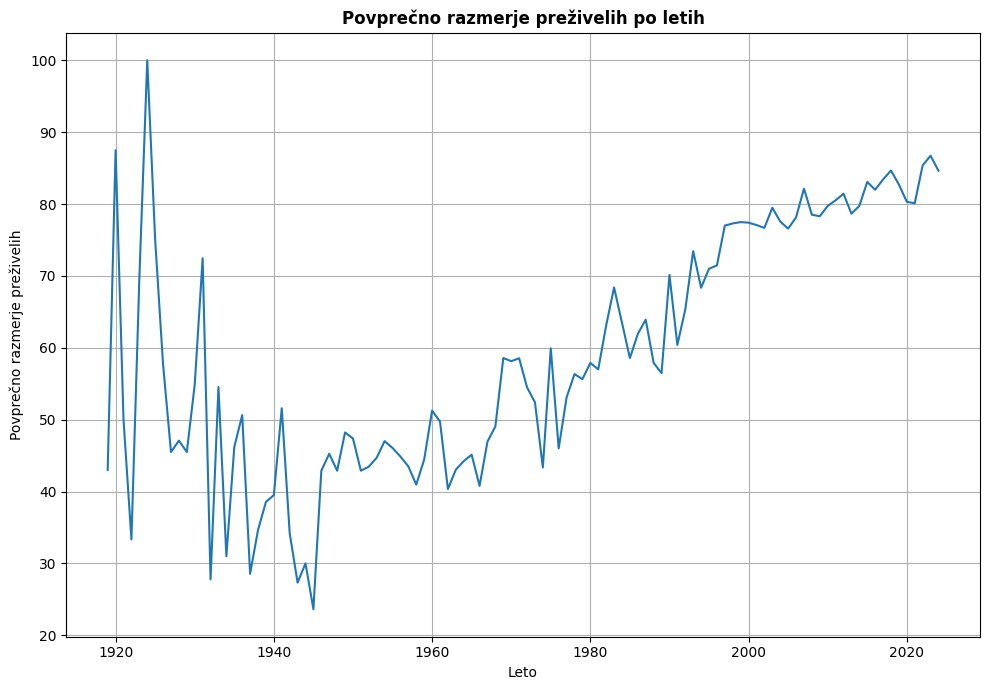

In [133]:
povprecje_letno.plot.line(figsize=(10, 7))
plt.title('Povprečno razmerje preživelih po letih', fontweight='bold');
plt.xlabel('Leto')
plt.ylabel('Povprečno razmerje preživelih')
plt.tight_layout()
plt.grid(True)

### Starost letala

In [134]:
tabela = letalske_nesrece.dropna(subset=['starost_letala', 'razmerje_prezivelih'])

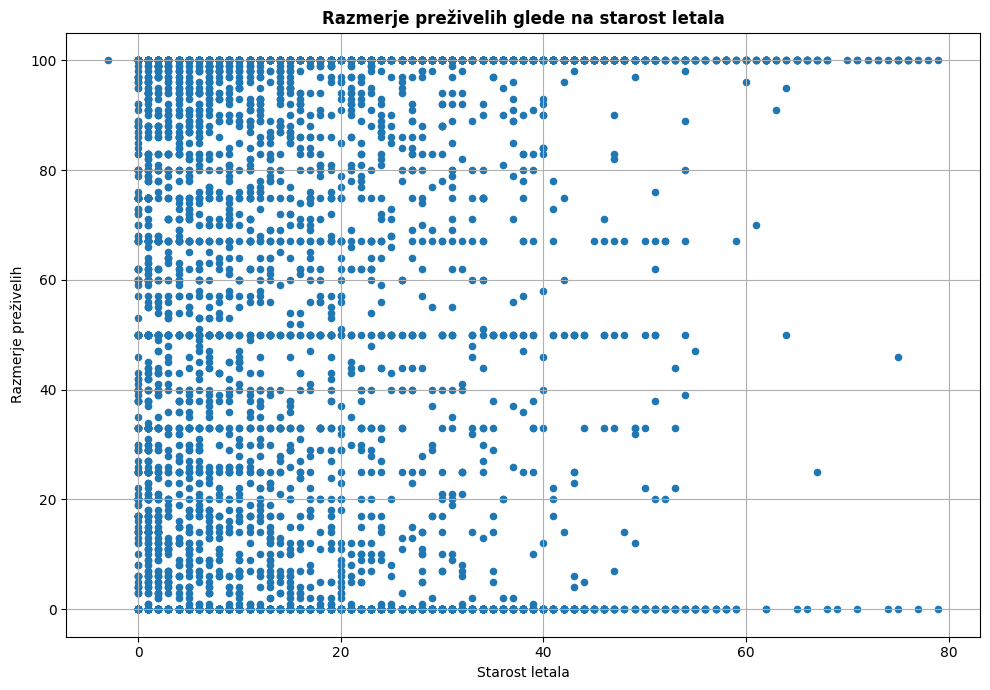

In [135]:
tabela.plot.scatter(x='starost_letala', y='razmerje_prezivelih', figsize=(10, 7))
plt.title("Razmerje preživelih glede na starost letala", fontweight='bold')
plt.xlabel("Starost letala")
plt.ylabel("Razmerje preživelih")
plt.grid(True)
plt.tight_layout()

In [136]:
tabela['desetletje'] = (tabela['leto'] // 10) * 10
povprecna_starost_letala = tabela.groupby('desetletje')['starost_letala'].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_10372\4212531950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela['desetletje'] = (tabela['leto'] // 10) * 10


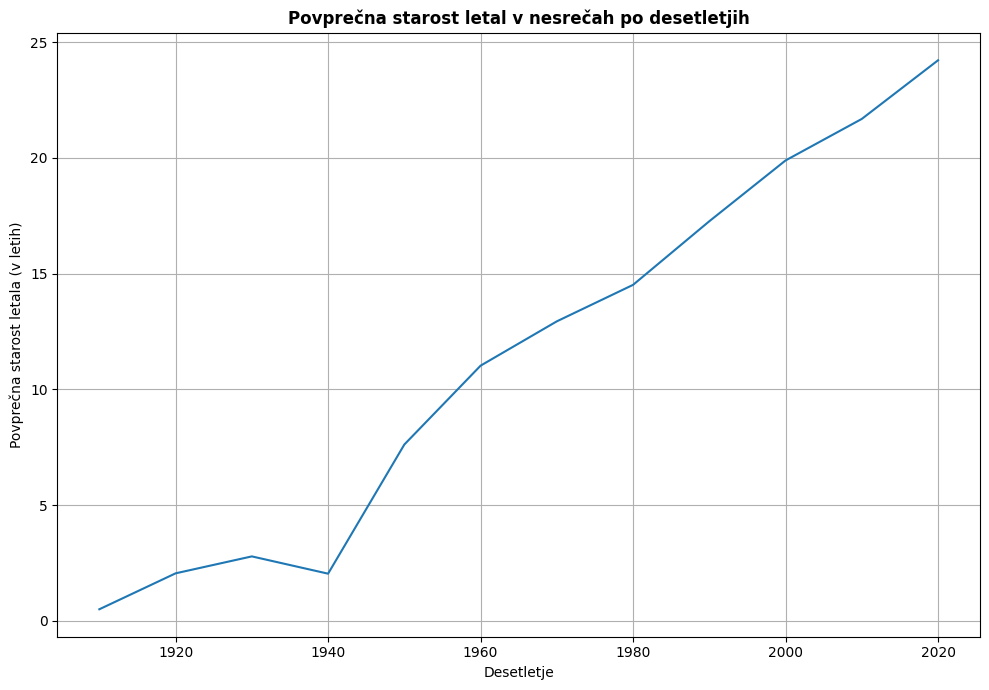

In [137]:
povprecna_starost_letala.plot.line(figsize=(10, 7))
plt.title("Povprečna starost letal v nesrečah po desetletjih", fontweight='bold')
plt.xlabel("Desetletje")
plt.ylabel("Povprečna starost letala (v letih)")
plt.grid(True)
plt.tight_layout()

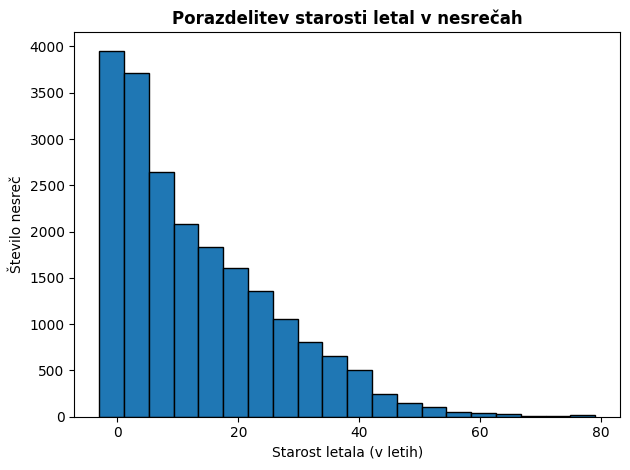

In [138]:
letalske_nesrece['starost_letala'].dropna().astype(float).plot.hist(bins=20, edgecolor='black')
plt.title("Porazdelitev starosti letal v nesrečah", fontweight='bold')
plt.xlabel("Starost letala (v letih)")
plt.ylabel("Število nesreč")
plt.tight_layout()
plt.show()

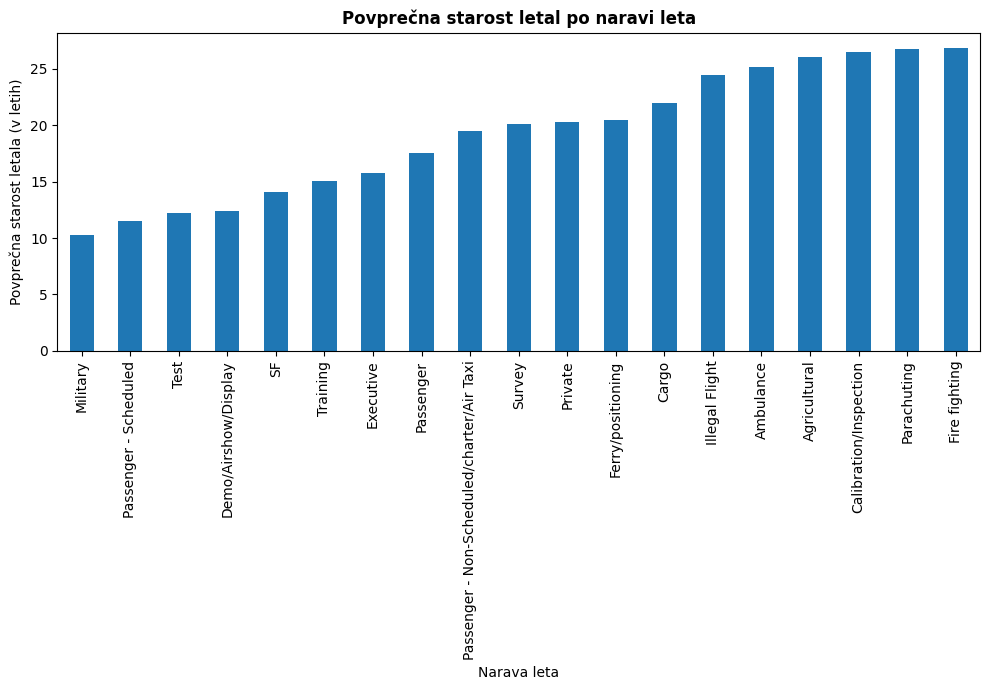

In [139]:
letalske_nesrece = letalske_nesrece.dropna()
povprecna_starost = letalske_nesrece.groupby('narava_leta')['starost_letala'].mean().sort_values()
povprecna_starost.plot(kind='bar', figsize=(10,7))
plt.title("Povprečna starost letal po naravi leta", fontweight='bold')
plt.ylabel("Povprečna starost letala (v letih)")
plt.xlabel("Narava leta")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

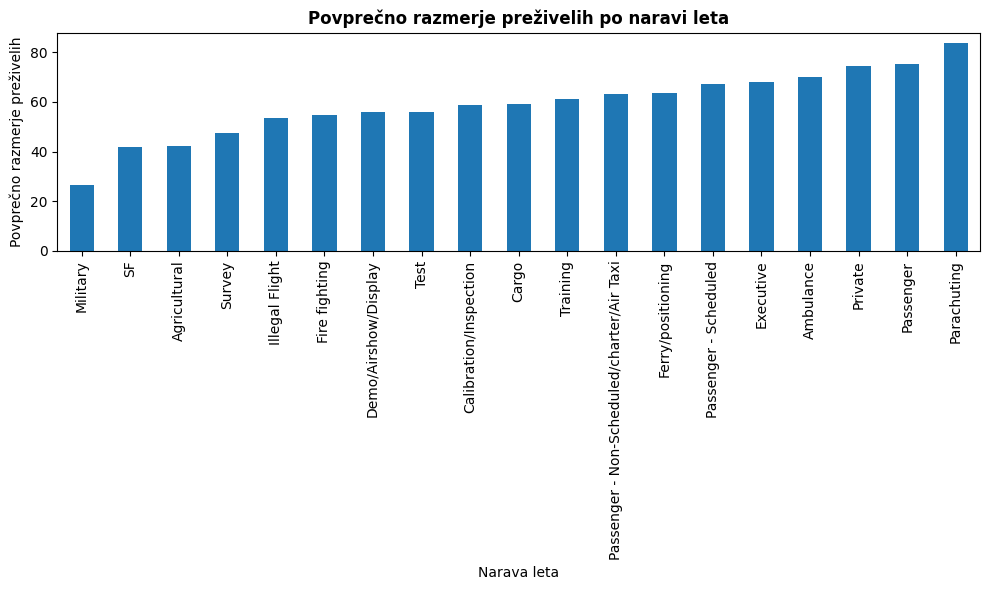

In [140]:
letalske_nesrece = letalske_nesrece.dropna()
povprecno_razmerje = letalske_nesrece.groupby('narava_leta')['razmerje_prezivelih'].mean().sort_values()

povprecno_razmerje.plot(kind='bar', figsize=(10,6))
plt.title("Povprečno razmerje preživelih po naravi leta", fontweight='bold')
plt.ylabel("Povprečno razmerje preživelih")
plt.xlabel("Narava leta")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()